## PHASE 1 - Data Familiarization and Initial Processing

PROBLEM STATEMENT 1 - ANALYSIS OF ATARI 2600

In [ ]:
#PS1

import pandas as pd

# Assuming you have a CSV file containing sales data for Atari 2600 games
sales_data = pd.read_csv("/content/VGsales_datasets.csv")

# Filter data for the years 1980 and 1981
atari_1980_1981 = sales_data[(sales_data['Year'] == 1980) | (sales_data['Year'] == 1981)]

# Group data by year and calculate total sales
sales_by_year = atari_1980_1981.groupby('Year')['Global_Sales'].sum().reset_index()



# Save to a new CSV for Power BI
sales_by_year.to_csv('/content/atari_sales_trends.csv', index=False)
print(sales_by_year.head())

     Year  Global_Sales
0  1980.0         82.42
1  1981.0        227.78


PROBLEM STATEMENT 2 - GENRE PERFORMANCE DASHBOARD

In [ ]:
#PS2
# Load the dataset
df = pd.read_csv('/content/VGsales_datasets.csv')

# Filter for Atari 2600 and years 1980 and 1981
atari_genres = df[(df['Platform'] == '2600') & (df['Year'].isin([1980, 1981]))]

# Group by genre and sum sales
genre_performance = atari_genres.groupby('Genre')['Global_Sales'].sum().reset_index()

# Save to a new CSV for Power BI
genre_performance.to_csv('/content/atari_genre_performance.csv', index=False)
print(genre_performance.head())

      Genre  Global_Sales
0    Action         95.48
1  Fighting          4.62
2      Misc         16.26
3  Platform         46.08
4    Puzzle         13.44


PROBLEM STATEMENT 3 - REGIONAL GENRE POPULARITY

In [ ]:
#PS3
regional_genre_sales = atari_genres.groupby('Genre')[['NA_Sales', 'EU_Sales']].sum().reset_index()
# Calculate the difference between North America and Europe sales
regional_genre_sales['NA_vs_EU'] = regional_genre_sales['NA_Sales'] - regional_genre_sales['EU_Sales']
# Save the preprocessed data to a CSV file for further analysis
preprocessed_file_path = 'Regional_genre_popularity.csv'
regional_genre_sales.to_csv(preprocessed_file_path, index=False)
print(regional_genre_sales)

        Genre  NA_Sales  EU_Sales  NA_vs_EU
0      Action    103.38      6.05     97.33
1    Fighting      5.04      0.28      4.76
2        Misc     17.71      1.05     16.66
3    Platform     49.50      2.83     46.67
4      Puzzle     14.63      0.91     13.72
5      Racing      3.15      0.21      2.94
6     Shooter    128.61      8.03    120.58
7  Simulation      2.94      0.14      2.80
8      Sports      8.40      0.49      7.91


## PHASE 2 - Data Ingestion and Storage Optimization

PROBLEM STATEMENT 4 - PLATFORM SALES ANALYSIS

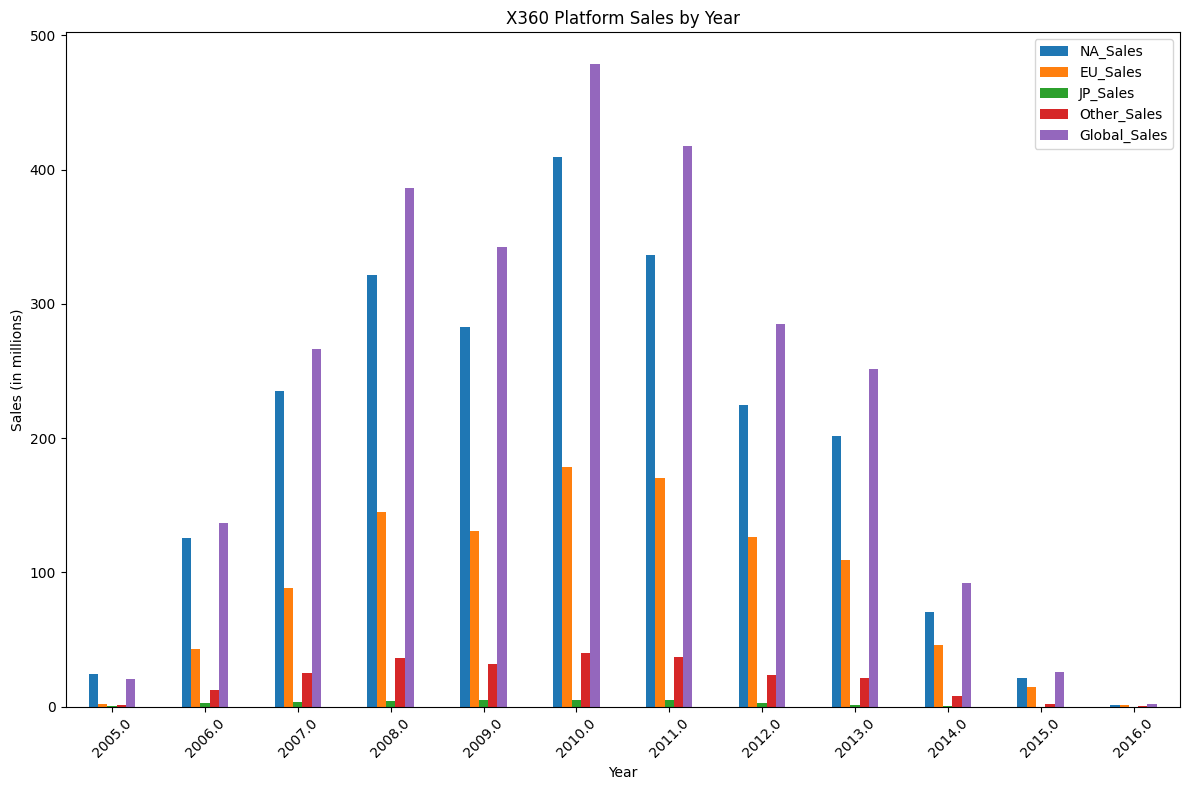

Global Sales for X360 platform: 2704.2299999999996


In [ ]:
#PS4
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/VGsales_datasets.csv")

# Filter records for the X360 platform
x360_df = df[df['Platform'] == 'X360']

# Group by Year and sum up the sales
country_sales = x360_df.groupby('Year').agg({'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum', 'Global_Sales':'sum'})

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

country_sales.plot(kind='bar', ax=ax)
plt.title('X360 Platform Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Global sales
global_sales = country_sales['Global_Sales'].sum()
print("Global Sales for X360 platform:", global_sales)

PROBLEM STATEMENT 5 - GENRE SPECIFIC SALES IN JAPAN

In [ ]:
#PS5
# Load the dataset
df = pd.read_csv("VGsales_datasets.csv")

# Convert 'JP_Sales' and 'EU_Sales' columns to numeric data types, ignoring errors
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'], errors='coerce')
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'], errors='coerce')

# Filter data where JP sales are higher than EU sales
jp_sales = df[df['JP_Sales'] > df['EU_Sales']]

# Save the filtered data to a CSV file
jp_sales.to_csv('JP_Sales.csv', index=False)


# Analyze the contribution of different genres to sales in various regions
genre_sales = df.groupby('Genre').agg({'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum', 'Global_Sales':'sum'})
print("Genre-Specific Sales in Different Regions:")
print(genre_sales)

Genre-Specific Sales in Different Regions:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action         2586.82   1570.31    372.04       359.92       3373.37
Adventure       231.41    152.88    105.37        21.57        290.87
Fighting        544.84    259.08    185.82        52.19        632.99
Misc           1007.43    535.66    223.34       103.32       1158.75
Platform       1093.28    506.42    259.38        71.21       1179.74
Puzzle          306.56    127.90    114.42        16.61        339.84
Racing          874.70    616.21    105.42       117.14       1086.86
Role-Playing    820.91    543.87    797.89        89.04       1328.13
Shooter        1967.92    995.42     86.65       224.87       2364.23
Simulation      419.73    284.13    133.14        40.49        514.02
Sports         1897.69   1139.00    322.59       278.20       2485.58
Strategy        164.58    107.56     99.98     

PROBLEM STATEMENT 6 - PS3 SPORTS GAME

In [ ]:
#PS6
# Filter for PS3 sports games and sort by global sales
ps3_sports = df[(df['Platform'] == 'PS3') & (df['Genre'] == 'Sports')].sort_values(by='Global_Sales', ascending=False)

# Save the sorted data to a CSV file
ps3_sports.to_csv('sportsps.csv', index=False)


PROBLEM STATEMENT 7 - POST-2010 SPORTS GAMES ANALYSIS

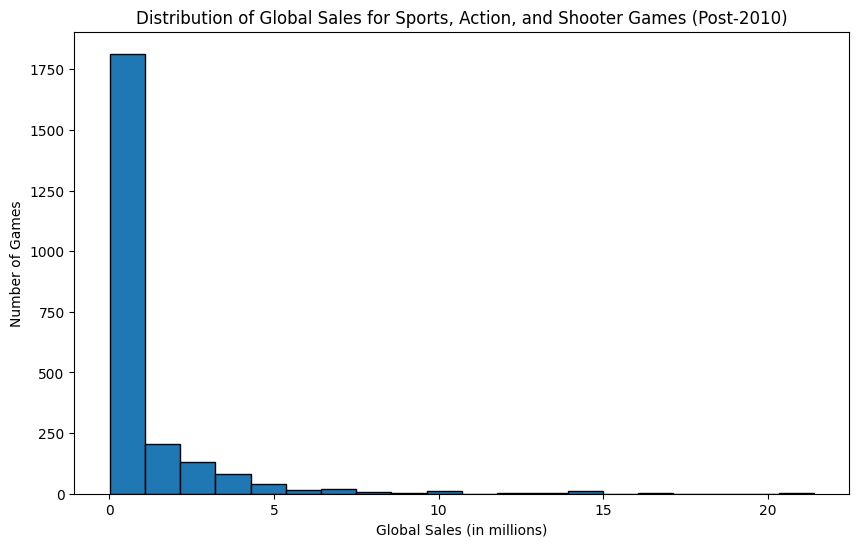

Summary Statistics of Global Sales for Sports Games (Action/Shooter) Since 2010:
count    2355.000000
mean        1.025274
std         2.069300
min         0.010000
25%         0.080000
50%         0.250000
75%         0.960000
max        21.400000
Name: Global_Sales, dtype: float64


In [ ]:
#PS7
# Filter for sports games in action or shooter genres since 2010
sports_action_shooter = df[(df['Year'] >= 2010) & (df['Genre'].isin(['Action', 'Shooter']))]

# Plot the distribution of global sales
plt.figure(figsize=(10, 6))
plt.hist(sports_action_shooter['Global_Sales'], bins=20, edgecolor='k')
plt.title('Distribution of Global Sales for Sports, Action, and Shooter Games (Post-2010)')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Number of Games')
plt.show()
sports_action_shooter.to_csv('/content/sports_action_shooter.csv', index=False)
# Explain the findings
print("Summary Statistics of Global Sales for Sports Games (Action/Shooter) Since 2010:")
print(sports_action_shooter['Global_Sales'].describe())

## PHASE 3 - DATA TRANSFORMATION

PROBLEM STATEMENT 8 - GENRE RELEASES AND SALES

In [ ]:
#PS8
# Filter data for Atari 2600 games released in 1980 and 1981
atari_data = df[(df['Platform'] == '2600') & (df['Year'].isin([1980, 1981]))]

# Group by Genre and calculate the number of releases and total global sales for each genre
genre_analysis = atari_data.groupby('Genre').agg(
    Number_of_Releases=('Name', 'count'),
    Total_Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Display the results
print(genre_analysis)
genre_analysis.to_csv('/content/genre_analysis.csv', index=False)

        Genre  Number_of_Releases  Total_Global_Sales
0      Action                 184               95.48
1    Fighting                   7                4.62
2        Misc                  28               16.26
3    Platform                  22               46.08
4      Puzzle                  14               13.44
5      Racing                   7                2.88
6     Shooter                  90              121.06
7  Simulation                   7                2.70
8      Sports                  35                7.68


PROBLEM STATEMENT 9 - HIGH SALES GENRE

In [ ]:
#PS9
# Filter data for Atari 2600 games released in 1980 and 1981
atari_data = df[(df['Platform'] == '2600') & (df['Year'].isin([1980, 1981]))]

# Group by Genre and calculate the number of releases and total global sales for each genre
genre_analysis = atari_data.groupby('Genre').agg(
    Number_of_Releases=('Name', 'count'),
    Total_Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Display the results
print(genre_analysis)

        Genre  Number_of_Releases  Total_Global_Sales
0      Action                 184               95.48
1    Fighting                   7                4.62
2        Misc                  28               16.26
3    Platform                  22               46.08
4      Puzzle                  14               13.44
5      Racing                   7                2.88
6     Shooter                  90              121.06
7  Simulation                   7                2.70
8      Sports                  35                7.68


PROBLEM STATEMENT 10 - DECADE BASED SALES ANALYSIS

In [ ]:
#PS10

import pandas as pd

# Load the CSV file
file_path = '/content/VGsales_datasets.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()
# Filter the records with sales between 2 million and 10 million
filtered_data = data[(data['Global_Sales'] >= 2) & (data['Global_Sales'] <= 10)]

# Create a function to categorize years into decades
def categorize_decade(year):
    if 1990 <= year <= 1999:
        return '1990-1999'
    elif 2000 <= year <= 2009:
        return '2000-2009'
    elif 2010 <= year <= 2016:
        return '2010-2016'
    else:
        return 'Other'

# Apply the function to the dataset
filtered_data['Decade'] = filtered_data['Year'].apply(categorize_decade)

# Filter out any records that fall into the 'Other' category
filtered_data = filtered_data[filtered_data['Decade'] != 'Other']

# Display the first few rows of the filtered dataset
filtered_data.head()
# Group by Decade and Genre and sum the sales
genre_sales_by_decade = filtered_data.groupby(['Decade', 'Genre'])['Global_Sales'].sum().reset_index()

# Pivot the table for better visualization
pivot_table = genre_sales_by_decade.pivot(index='Genre', columns='Decade', values='Global_Sales')

# Display the pivot table
pivot_table

<ipython-input-10-4a0d213fd1d8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Decade'] = filtered_data['Year'].apply(categorize_decade)


Decade,1990-1999,2000-2009,2010-2016
Genre,,,
Action,254.01,855.80,684.70
Adventure,21.60,37.13,20.86
Fighting,96.98,151.84,42.37
Misc,51.46,302.02,185.70
Platform,226.30,218.74,104.92
Puzzle,14.50,68.44,5.38
Racing,130.38,268.48,72.38
Role-Playing,87.80,361.74,245.32
Shooter,94.80,539.58,641.51


## PHASE 4 - DATA WAREHOUSING AND VISUALIZATION

PROBLEM STATEMENT 11 - TOP AND UNDERPERFORMING GAMES

In [ ]:
#PS11
import pandas as pd

# Load data (replace 'path/to/data.csv' with your actual file path)
data = pd.read_csv('/content/VGsales_datasets.csv')

# Filter for games with global sales data
data_filtered = data.dropna(subset=['Global_Sales'])

# Top Performers
top_performers = data_filtered.nlargest(10, 'Global_Sales')  # Top 10 by default

# Underperformers
underperformers = data_filtered.nsmallest(10, 'Global_Sales')  # Bottom 10 by default

# Print results (optional)
print("Top Performers:")
print(top_performers)
print("\nUnderperformers:")
print(underperformers)
top_performers.to_csv('/content/top_performers.csv', index=False)
underperformers.to_csv('/content/underperformers.csv', index=False)

Top Performers:
       Rank                      Name Platform    Year         Genre  \
22626   1.0                Wii Sports      Wii  2006.0        Sports   
30798   1.0                Wii Sports      Wii  2006.0        Sports   
24808   2.0         Super Mario Bros.      NES  1985.0      Platform   
33008   3.0            Mario Kart Wii      Wii  2008.0        Racing   
22692   4.0         Wii Sports Resort      Wii  2009.0        Sports   
34436   4.0         Wii Sports Resort      Wii  2009.0        Sports   
25391   5.0  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
24874   6.0                    Tetris       GB  1989.0        Puzzle   
30799   7.0     New Super Mario Bros.       DS  2006.0      Platform   
30800   8.0                  Wii Play      Wii  2006.0          Misc   

      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
22626  Nintendo     41.49     29.02      3.77         8.46         82.74   
30798  Nintendo     41.49     29.02    

PROBLEM STATEMENT 12 - RACING GENRE SALES ANALYSIS

In [ ]:
#PS12
# Filter for racing genre and years 2000-2009
racing_sales = df[(df['Genre'] == 'Racing') & (df['Year'].between(2000, 2009))]

# Filter where EU sales are greater than JP, NA, and other sales
eu_dominant_sales = racing_sales[(racing_sales['EU_Sales'] > racing_sales['JP_Sales']) &
                                 (racing_sales['EU_Sales'] > racing_sales['NA_Sales']) &
                                 (racing_sales['EU_Sales'] > racing_sales['Other_Sales'])]

# Get top 5 records for EU sales
top_5_eu_sales = eu_dominant_sales.nlargest(5, 'EU_Sales')[['Name', 'EU_Sales']].set_index('Name')

# Save to a new CSV for Power BI
top_5_eu_sales.to_csv('/content/racing_eusales.csv')
print(top_5_eu_sales.head())

                              EU_Sales
Name                                  
Need for Speed Underground 2      3.02
Need for Speed Underground 2      3.02
Need for Speed Underground 2      3.02
The Simpsons: Hit & Run           2.19
The Simpsons: Hit & Run           2.19


PROBLEM STATEMENT 13 - CUMULATIVE SALES VISUALIZATIONS

<ipython-input-13-1f463a9bb8ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xb_sales['Cumulative_NA_Sales'] = xb_sales['NA_Sales'].cumsum()
<ipython-input-13-1f463a9bb8ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xb_sales['Cumulative_JP_Sales'] = xb_sales['JP_Sales'].cumsum()


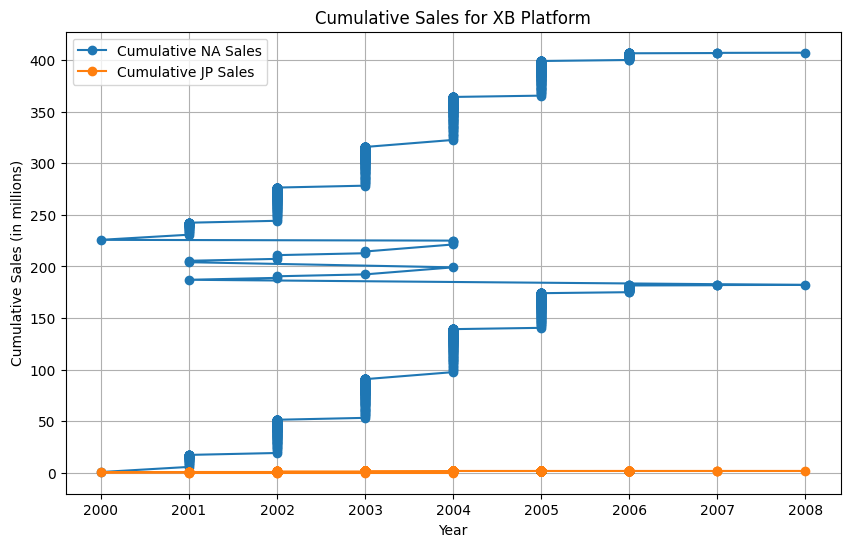

In [ ]:
#PS13
# Filter for XB platform
xb_sales = df[df['Platform'] == 'XB']

# Calculate the cumulative sum of NA and JP sales
xb_sales['Cumulative_NA_Sales'] = xb_sales['NA_Sales'].cumsum()
xb_sales['Cumulative_JP_Sales'] = xb_sales['JP_Sales'].cumsum()

# Plot the cumulative sum of NA sales
plt.figure(figsize=(10, 6))
plt.plot(xb_sales['Year'], xb_sales['Cumulative_NA_Sales'], label='Cumulative NA Sales', marker='o')
plt.plot(xb_sales['Year'], xb_sales['Cumulative_JP_Sales'], label='Cumulative JP Sales', marker='o')
plt.title('Cumulative Sales for XB Platform')
plt.xlabel('Year')
plt.ylabel('Cumulative Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()
xb_sales.to_csv('xb_sales.csv')

## FINAL PHASE - REPORTING AND VISUALIZATION

PROBLEM STATEMENT 14 - SALES ACRROSS DECADE

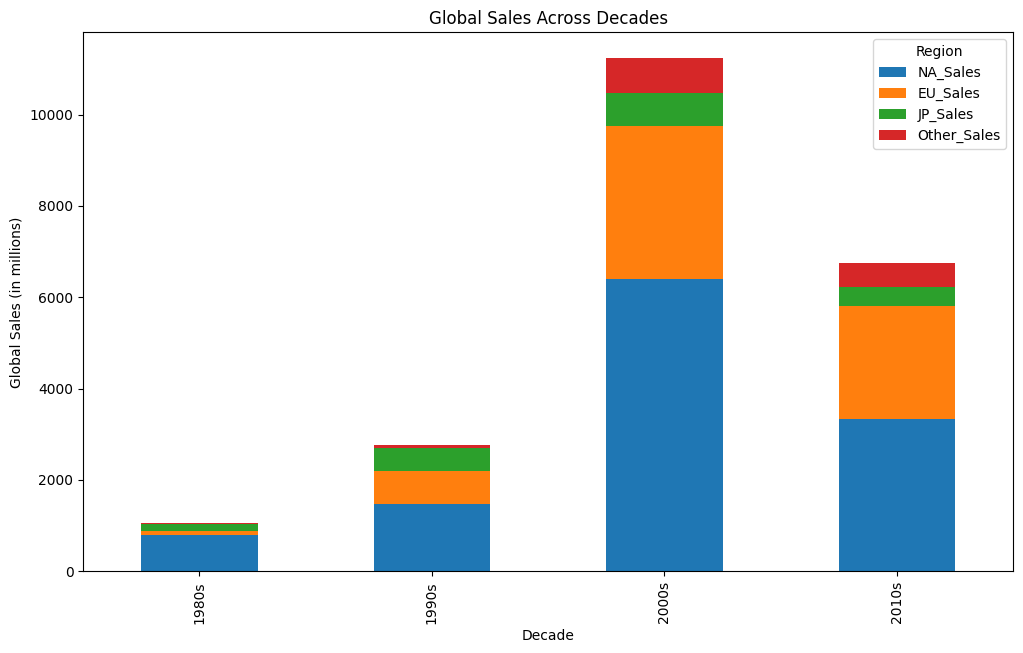

In [ ]:
#PS14
# Create a new column for decades
df['Decade'] = pd.cut(df['Year'], bins=[1980, 1989, 1999, 2009, 2016], labels=['1980s', '1990s', '2000s', '2010s'])

# Sum global sales across decades for each region
region_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Ensure the columns exist in the DataFrame
region_sales_columns = [col for col in region_sales_columns if col in df.columns]

# Group by Decade and sum sales for each region
sales_across_decades = df.groupby('Decade')[region_sales_columns].sum()

# Plot the sales across decades
sales_across_decades.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Global Sales Across Decades')
plt.xlabel('Decade')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Region')
plt.show()


PROBLEM STATEMENT 15 - FEATURE IMPACT ON SALES

In [ ]:
# PS15
atari_2600_games = data[(data['Platform'] == '2600') & (data['Publisher'] == 'Atari')]

# Descriptive statistics for sales data
atari_2600_stats = atari_2600_games.describe()

# Sales by Genre
sales_by_genre = atari_2600_games.groupby('Genre').sum(numeric_only=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Sales by Publisher
sales_by_publisher = atari_2600_games.groupby('Publisher').sum(numeric_only=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Calculate correlation matrix
correlation_matrix = atari_2600_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
# PS-15 RESULTS
print("Descriptive Statistics for Atari 2600 Sales Data:")
atari_2600_stats
print("\nCorrelation Matrix:")
correlation_matrix

Descriptive Statistics for Atari 2600 Sales Data:

Correlation Matrix:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.998293,NaN,0.982857,0.999990
EU_Sales,0.998293,1.000000,NaN,0.985431,0.998448
JP_Sales,NaN,NaN,NaN,NaN,NaN
Other_Sales,0.982857,0.985431,NaN,1.000000,0.983109
Global_Sales,0.999990,0.998448,NaN,0.983109,1.000000
